In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
from matplotlib.pylab import plt

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/My Drive/CS3244 Project')
os.chdir('Dataset/')

In [ ]:
import pandas as pd
import numpy as np
import pickle

from torch.autograd import Variable
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

import torch.utils.data as data_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

# Train, test split

In [ ]:
df_train = pd.read_csv('train_reduced.csv')
df_test = pd.read_csv('test_reduced.csv')

# Separate the feature columns (x) from the target column (y) in both DataFrames
X_train = df_train.drop('target', axis=1)
y_train = df_train['target']

X_test = df_test.drop('target', axis=1)
y_test = df_test['target']

In [ ]:
df_train.describe()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,EMPLOYED,LONG_TERM_UNEMPLOYED,paid_pastdue_diff,...,WAY_OF_LIVING,age_bins,RATIO_EMPLOYED,Age_Children_Interaction,debt_to_income_ratio,stable_employment,occupation_type_frequency,occupation_mean_income,income_percentile_by_housing,target
count,2.916000e+04,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,...,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000
mean,5.078137e+06,0.329424,0.380247,0.671262,0.223800,0.294582,0.090055,-0.000104,0.168347,-0.002035,...,4.607373,1.914815,0.000517,0.005456,0.006214,0.440364,0.000118,0.001969,0.002376,0.677058
std,4.176970e+04,0.470012,0.485456,0.469763,0.416797,0.455862,0.286265,1.000109,0.374181,1.000882,...,1.216700,1.450847,0.999210,1.005875,1.046210,0.496439,0.999179,0.999809,1.001111,0.467609
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.222945,0.000000,-3.956545,...,0.000000,0.000000,-1.102871,-0.582037,-0.066309,0.000000,-1.422529,-1.963103,-1.697420,0.000000
25%,5.042066e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.449854,0.000000,-0.560740,...,5.000000,1.000000,-0.874084,-0.582037,-0.066309,0.000000,-0.691820,-0.662794,-0.863359,0.000000
50%,5.074528e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.449854,0.000000,-0.112238,...,5.000000,2.000000,-0.238520,-0.582037,-0.066309,0.000000,-0.548500,-0.107140,-0.111538,1.000000
75%,5.114554e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.449854,0.000000,0.464408,...,5.000000,3.000000,0.621997,0.592727,-0.066309,1.000000,1.365404,0.130435,0.856331,1.000000
max,5.150485e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.449854,1.000000,3.732069,...,5.000000,4.000000,3.026937,7.127354,55.329399,1.000000,1.365404,2.797118,1.674092,1.000000


In [ ]:
df_test.describe()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,EMPLOYED,LONG_TERM_UNEMPLOYED,paid_pastdue_diff,...,WAY_OF_LIVING,age_bins,RATIO_EMPLOYED,Age_Children_Interaction,debt_to_income_ratio,stable_employment,occupation_type_frequency,occupation_mean_income,income_percentile_by_housing,target
count,7.291000e+03,7291.000000,7291.000000,7291.000000,7291.000000,7291.00000,7291.000000,7291.000000,7291.000000,7291.000000,...,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000
mean,5.078578e+06,0.331642,0.377452,0.675902,0.232204,0.29557,0.088465,0.000416,0.168153,0.008137,...,4.602387,1.916610,-0.002070,-0.021820,-0.024853,0.443286,-0.000471,-0.007875,-0.009501,0.677273
std,4.230502e+04,0.470835,0.484783,0.468069,0.422267,0.45633,0.283990,0.999700,0.374027,0.996561,...,1.227727,1.456045,1.003286,0.975982,0.788220,0.496807,1.003416,1.000861,0.995627,0.467551
min,5.008809e+06,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-2.222945,0.000000,-3.892473,...,0.000000,0.000000,-1.102871,-0.582037,-0.066309,0.000000,-1.422529,-1.963103,-1.697420,0.000000
25%,5.041852e+06,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.449854,0.000000,-0.560740,...,5.000000,1.000000,-0.901181,-0.582037,-0.066309,0.000000,-0.691820,-0.662794,-0.863359,0.000000
50%,5.074808e+06,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.449854,0.000000,-0.112238,...,5.000000,2.000000,-0.249744,-0.582037,-0.066309,0.000000,-0.548500,-0.385452,-0.111538,1.000000
75%,5.115778e+06,1.000000,1.000000,1.000000,0.000000,1.00000,0.000000,0.449854,0.000000,0.464408,...,5.000000,3.000000,0.627077,0.556016,-0.066309,1.000000,1.365404,0.130435,0.856331,1.000000
max,5.150487e+06,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.449854,1.000000,3.539854,...,5.000000,4.000000,2.937530,6.576683,55.329399,1.000000,1.365404,2.797118,1.674092,1.000000


## Autoencoders

In [ ]:
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = nn.Sequential(
        nn.Linear(44, 14),
        nn.Tanh(),
        nn.Linear(14, 7),
        nn.LeakyReLU(),
    )

    self.decoder = nn.Sequential(
        nn.Linear(7, 7),
        nn.Tanh(),
        nn.Linear(7, 44),
        nn.LeakyReLU()
    )

  def forward(self, x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x

In [ ]:
model = Autoencoder().double().cpu()

In [ ]:
# Hyperparameters for training such as number of epochs, minibatch size and learning rate are defined
num_epochs = 50
minibatch_size = 32
learning_rate = 1e-3

In [ ]:
# PyTorch's DataLoader is used to create training and testing data loaders with the defined batch sizes
# Mean squared error loss is chosen as the criterion to evaluate the model's performance, and the Adam optimizer is selected for training the model
# A dictionary 'history' is created to store the training loss for each epoch
train_loader = data_utils.DataLoader(X_train, batch_size=minibatch_size, shuffle=True)
test_loader = data_utils.DataLoader(X_test, batch_size=1, shuffle=False)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
model.parameters(), lr=learning_rate, weight_decay=10e-05)
history = {}
history['train_loss'] = []
history['test_loss'] = []

test cleaned df instead

In [ ]:
# PyTorch's DataLoader is used to create training and testing data loaders with the defined batch sizes
# Mean squared error loss is chosen as the criterion to evaluate the model's performance, and the Adam optimizer is selected for training the model
# A dictionary 'history' is created to store the training loss for each epoch
X_train = X_train_transformed.values
X_test = X_test_transformed.values
train_loader = data_utils.DataLoader(X_train, batch_size=minibatch_size, shuffle=True)
test_loader = data_utils.DataLoader(X_test, batch_size=1, shuffle=False)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
model.parameters(), lr=learning_rate, weight_decay=10e-05)
history = {}
history['train_loss'] = []
history['test_loss'] = []

NameError: ignored

In [ ]:
# The model is trained for a defined number of epochs. In each epoch, the model forward propagates the input data, computes the loss, backpropagates the gradients, and updates the weights
# After each epoch, the average training loss is calculated, printed out, and stored in the 'history' dictionary
# The trained model's parameters are saved to a file using torch.save
for epoch in range(num_epochs):
    h = np.array([])
    for data in train_loader:
        # ===================forward=====================
        output = model(data)
        loss = criterion(output, data)
        h = np.append(h, loss.item())

        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    mean_loss = np.mean(h)
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch + 1, num_epochs, mean_loss))
    history['train_loss'].append(mean_loss)


torch.save(model.state_dict(), './credit_model.pth')

In [ ]:
# The training loss history is plotted over epochs
plt.plot(history['train_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.axis([0,100,0.69,0.80])
#plt.legend(['train', 'test'], loc='upper right');
plt.show()

In [ ]:
# The model is set to evaluation mode with model.eval(). This turns off specific layers/parts of the model that behave differently during training, like dropout layers.
# A 'with torch.no_grad()' block is used to run model inference, which tells PyTorch that gradients don't need to be computed, thus saving memory.
# For each batch of data in the test loader, the model forward propagates the input, computes the loss with the criterion, and appends the loss to 'pred_losses'.
# A DataFrame 'reconstructionErrorDF' is created from 'pred_losses' and a new 'Class' column is added to it, which contains the actual class labels from 'y_test'.
# The 'describe' method of the DataFrame is called to display statistics of the 'reconstructionErrorDF' DataFrame.

pred_losses = {'pred_loss' : []}
model.eval()
with torch.no_grad():
   # test_loss = 0
    for data in test_loader:
        inputs = data
        # print(inputs)
        outputs = model(inputs)
        loss = criterion(outputs, inputs).data.item()
        #print(loss)
        pred_losses['pred_loss'].append(loss)
        #pred_losses = model([y_test.size, y_test])
reconstructionErrorDF = pd.DataFrame(pred_losses)
reconstructionErrorDF['Class'] = y_test
reconstructionErrorDF.describe()

In [ ]:
pred_losses = {'pred_loss': []}
model.eval()

with torch.no_grad():
    for data in test_loader:
        # Assuming 'data' contains only features. If it includes labels, unpack them accordingly
        inputs = data
        outputs = model(inputs)
        loss = criterion(outputs, inputs).data.item()
        pred_losses['pred_loss'].append(loss)

reconstructionErrorDF = pd.DataFrame(pred_losses)

# Ensure y_test is in the correct format to add to DataFrame
if isinstance(y_test, torch.Tensor):
    y_test_array = y_test.numpy()  # or y_test.tolist()
else:
    y_test_array = y_test
y_test_array.reset_index(drop=True, inplace=True)

# Ensure alignment in lengths
assert len(y_test_array) == len(reconstructionErrorDF), "Length of y_test and pred_loss must be the same."

reconstructionErrorDF['Class'] = y_test_array


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Choose a threshold (this could be based on domain knowledge, or you might use a validation set to find an optimal threshold)
threshold = np.percentile(reconstructionErrorDF.pred_loss, 95)  # for example, set threshold as the 95th percentile of pred_loss

# Create binary predictions
reconstructionErrorDF['prediction'] = (reconstructionErrorDF.pred_loss >= threshold).astype(int)

# Calculate metrics
accuracy = accuracy_score(reconstructionErrorDF['Class'], reconstructionErrorDF['prediction'])
precision = precision_score(reconstructionErrorDF['Class'], reconstructionErrorDF['prediction'], zero_division=0)
recall = recall_score(reconstructionErrorDF['Class'], reconstructionErrorDF['prediction'])

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


In [ ]:
fpr, tpr, thresholds = roc_curve(reconstructionErrorDF.Class, reconstructionErrorDF.pred_loss)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## ML

In [ ]:
df = pd.read_csv('app_relabelled_cleaned.csv')

In [ ]:
df.head()

In [ ]:
from sklearn.model_selection import train_test_split

# train-test set split
X = df.drop('target', axis= 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Porportion of good and bad accounts in training data: \n', y_train.value_counts())
print('Porportion of good and bad accounts in testing data: \n', y_test.value_counts())

#X_train = X_train.values
#X_test = X_test.values
#y_test = y_test.values

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import make_scorer

# calculate precision-recall area under curve
def pr_auc(y_true, probas_pred):
    # calculate precision-recall curve
    p, r, _ = precision_recall_curve(y_true, probas_pred)
    # calculate area under curve
    return auc(r, p)

In [ ]:
def evaluate_model(X, y, model):
    # Define your evaluation here
    # For example, using cross-validation to get scores
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [ ]:
# one hot on OCCUPATION_TYPE
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['OCCUPATION_TYPE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS']

# Identify the numerical columns - these will be standardized
# Replace 'your_data' with your actual DataFrame variable
numerical_cols = ['YEARS_EMPLOYED', 'AMT_INCOME_TOTAL', 'AGE']

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

In [ ]:
def get_feature_names(column_transformer, input_features):
    output_features = []

    for name, transformer, col_names in column_transformer.transformers_:
        if isinstance(transformer, Pipeline):
            transformer = transformer.steps[-1][1]

        if isinstance(transformer, OneHotEncoder):
            transformed_features = transformer.get_feature_names_out(col_names)
            output_features.extend(transformed_features)
        elif transformer != 'drop':
            output_features.extend(col_names)

    # For the 'passthrough' columns
    if column_transformer.remainder == 'passthrough':
        remainder_cols = [col for col in input_features if col not in output_features]
        output_features.extend(remainder_cols)

    return output_features


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

# define models to test
def get_models():
    models, names = list(), list()
    # CART
    models.append(DecisionTreeClassifier())
    names.append('CART')
    # KNN
    #steps = [('s',StandardScaler()),('m',KNeighborsClassifier())]
    steps = [('m',KNeighborsClassifier())]
    models.append(Pipeline(steps=steps))
    names.append('KNN')
    # Bagging
    models.append(BaggingClassifier(n_estimators=100))
    names.append('BAG')
    # RF
    models.append(RandomForestClassifier(n_estimators=100))
    names.append('RF')
    # ET
    models.append(ExtraTreesClassifier(n_estimators=100))
    names.append('ET')
    return models, names

In [ ]:
cols = ['YEARS_EMPLOYED',
 'AMT_INCOME_TOTAL',
 'AGE',
 'OCCUPATION_TYPE_Accountants',
 'OCCUPATION_TYPE_Cleaning staff',
 'OCCUPATION_TYPE_Cooking staff',
 'OCCUPATION_TYPE_Core staff',
 'OCCUPATION_TYPE_Drivers',
 'OCCUPATION_TYPE_HR staff',
 'OCCUPATION_TYPE_High skill tech staff',
 'OCCUPATION_TYPE_IT staff',
 'OCCUPATION_TYPE_Laborers',
 'OCCUPATION_TYPE_Low-skill Laborers',
 'OCCUPATION_TYPE_Managers',
 'OCCUPATION_TYPE_Medicine staff',
 'OCCUPATION_TYPE_No Occupation Stated',
 'OCCUPATION_TYPE_Private service staff',
 'OCCUPATION_TYPE_Realty agents',
 'OCCUPATION_TYPE_Sales staff',
 'OCCUPATION_TYPE_Secretaries',
 'OCCUPATION_TYPE_Security staff',
 'OCCUPATION_TYPE_Waiters/barmen staff',
 'NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_State servant',
 'NAME_INCOME_TYPE_Student',
 'NAME_INCOME_TYPE_Working',
 'NAME_FAMILY_STATUS_Married',
 'NAME_FAMILY_STATUS_Separated',
 'NAME_FAMILY_STATUS_Single / not married',
 'NAME_FAMILY_STATUS_Widow',
        'ID','CODE_GENDER',
 'FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN',
 'FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL',
'CNT_FAM_MEMBERS',
 'EMPLOYED',
 'LONG_TERM_UNEMPLOYED',
 'EDUCATION',
 'WAY_OF_LIVING']

In [ ]:
# Fit the preprocessor on the training data
preprocessor.fit(X_train)

# Transform both training and test data
X_train_transformed = pd.DataFrame(
    preprocessor.transform(X_train),
    columns=cols,
    index=X_train.index  # to keep the same index as the original DataFrame
)
X_test_transformed = pd.DataFrame(
    preprocessor.transform(X_test),
    columns=cols,
    index=X_test.index  # to keep the same index as the original DataFrame
)

# Get the models and their names
models, names = get_models()

In [ ]:
## improved
results = []

for i, (model, name) in enumerate(zip(models, names)):
    # Wrap the model in a new pipeline that includes the preprocessor
    # For models that already include a pipeline (like KNN), we don't need to do this
    print(name)
    # Train the model
    model.fit(X_train_transformed, y_train)

    # Evaluate the model
    scores = evaluate_model(X_train_transformed, y_train, model)
    results.append(scores)
    # summarize performance
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

In [ ]:
results = []

for i, (model, name) in enumerate(zip(models, names)):
    # Wrap the model in a new pipeline that includes the preprocessor
    # For models that already include a pipeline (like KNN), we don't need to do this
    print(name)
    # Train the model
    model.fit(X_train_transformed, y_train)

    # Evaluate the model
    scores = evaluate_model(X_train_transformed, y_train, model)
    results.append(scores)
    # summarize performance
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

## retrain on new

In [ ]:
results = []

for i, (model, name) in enumerate(zip(models, names)):
    # Wrap the model in a new pipeline that includes the preprocessor
    # For models that already include a pipeline (like KNN), we don't need to do this
    print(name)
    # Train the model
    model.fit(X_train_transformed, y_train)

    # Evaluate the model
    scores = evaluate_model(X_train_transformed, y_train, model)
    results.append(scores)
    # summarize performance
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

# LSTM

In [ ]:
!pip install keras.utils

In [ ]:
import pandas as pd
import sklearn.metrics as metrique
from pandas import Series
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import numpy as np
from keras.callbacks import EarlyStopping
#from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Dropout,Input, Attention, Layer, Concatenate, Permute, Dot, Multiply, Flatten
from keras.layers import RepeatVector, Dense, Activation, Lambda
from keras.models import Sequential
from keras import backend as K, regularizers, Model, metrics
from keras.backend import cast

In [ ]:
class_counts = pd.Series(y_train).value_counts()
print(class_counts)

In [ ]:
X_train_transformed.shape

In [ ]:
np.random.seed(7)

# X_train et X_val
train_LSTM_X=X_train_transformed.values
val_LSTM_X=X_test_transformed.values

## Reshape input to be 3D [samples, timesteps, features]
train_LSTM_X = train_LSTM_X.reshape((train_LSTM_X.shape[0], 1, train_LSTM_X.shape[1]))
val_LSTM_X = val_LSTM_X.reshape((val_LSTM_X.shape[0], 1, val_LSTM_X.shape[1]))

train_LSTM_y=y_train
val_LSTM_y=y_test

In [ ]:
inputs=Input((1,44))
x1=LSTM(50,dropout=0.3,recurrent_dropout=0.2,return_sequences=True)(inputs)
x2=LSTM(50,dropout=0.3,recurrent_dropout=0.2)(x1)
outputs=Dense(1,activation='sigmoid')(x2)
model=Model(inputs,outputs)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(train_LSTM_X, train_LSTM_y,epochs=100,batch_size=2000, validation_data=(val_LSTM_X, val_LSTM_y))
model.save('Save_Model.h5')
print("Saved model to disk")

In [ ]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model

# load model
model = load_model('Save_Model.h5')
# summarize model.
model.summary()

In [ ]:
## changed
_, train_acc = model.evaluate(train_LSTM_X, train_LSTM_y, verbose=0)
_, test_acc = model.evaluate(val_LSTM_X, val_LSTM_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


In [ ]:
## initial
_, train_acc = model.evaluate(train_LSTM_X, train_LSTM_y, verbose=0)
_, test_acc = model.evaluate(val_LSTM_X, val_LSTM_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

In [ ]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Basic ML models

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

In [ ]:
X_test['ID'].nunique()

7291

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create and fit the model
model = DecisionTreeClassifier(max_depth=12, min_samples_split=8, random_state=1024)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

# Evaluate the model
print('Accuracy on test set: {:.2f}'.format(accuracy_score(y_test, y_predict)))
print('Classification Report:')
print(classification_report(y_test, y_predict))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_predict))


Accuracy on test set: 0.64
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.19      0.25      2353
           1       0.69      0.86      0.76      4938

    accuracy                           0.64      7291
   macro avg       0.54      0.52      0.51      7291
weighted avg       0.59      0.64      0.60      7291

Confusion Matrix:
[[ 440 1913]
 [ 698 4240]]


Accuracy Score is 0.67933
    0     1
0  43  2310
1  28  4910
[[0.01827454 0.98172546]
 [0.00567031 0.99432969]]


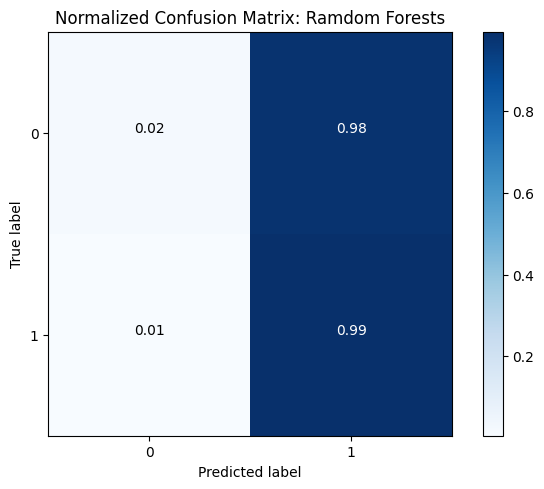

In [ ]:
model = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              )
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes=class_names, normalize = True,
                      title='Normalized Confusion Matrix: Ramdom Forests')

In [ ]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(num_leaves=31,
                       max_depth=8,
                       learning_rate=0.02,
                       n_estimators=250,
                       subsample = 0.8,
                       colsample_bytree =0.8
                      )
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19743, number of negative: 9417
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 29160, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.677058 -> initscore=0.740282
[LightGBM] [Info] Start training from score 0.740282
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Accuracy Score is 0.68015
    0     1
0  90  2263
1  69 

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(max_depth=12,
                      n_estimators=250,
                      min_child_weight=8,
                      subsample=0.8,
                      learning_rate =0.02,
                      seed=42)

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

Accuracy Score is 0.69414
     0     1
0  305  2048
1  182  4756


In [ ]:
# Calculate metrics
precision = precision_score(y_test, y_predict, zero_division=0)
recall = recall_score(y_test, y_predict)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')